## Building a Logistic Regression Classifier in PyTorch

Jay Urbain, PhD

12/30/2022

Logistic regression is a type of regression that predicts the probability of an event (see class slides). 

It is used for classification problems and has many applications in  machine learning.

The formula of logistic regression is to apply a sigmoid function to the output of a linear function.

#### The MNIST Dataset

The MNIST Dataset dataset contains 6000 images for training and 10000 images for testing the out-of-sample performance.

The MNIST dataset is a benchmark dataset and is part of PyTorch. 

Here is how you can load the training and testing samples of the MNIST dataset in PyTorch.

The dataset will be downloaded and extracted to the data directory.



In [2]:
!pwd

/Users/jayurbain/Dropbox/GraphMachineLearning_/GraphMachineLearning/work


In [4]:
import torchvision.transforms as transforms
from torchvision import datasets
 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

Verify download

In [6]:
print("number of training samples: " + str(len(train_dataset)) + "\n" +
      "number of testing samples: " + str(len(test_dataset)))

number of training samples: 60000
number of testing samples: 10000


ou can access samples from a dataset using list indexing. 

The first sample in the dataset is a FloatTensor and it is a 28x28-pixel image in grayscale (i.e., one channel), hence the size [1, 28, 28].

Check the labels of the first two samples in the training set.


In [8]:
# check the label of first two training sample
print("label of the first taining sample: ", train_dataset[0][1])
print("label of the second taining sample: ", train_dataset[1][1])

label of the first taining sample:  5
label of the second taining sample:  0


Display the images:

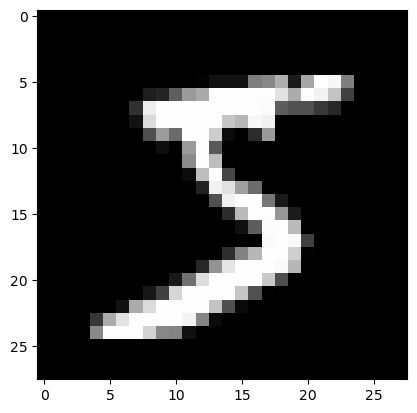

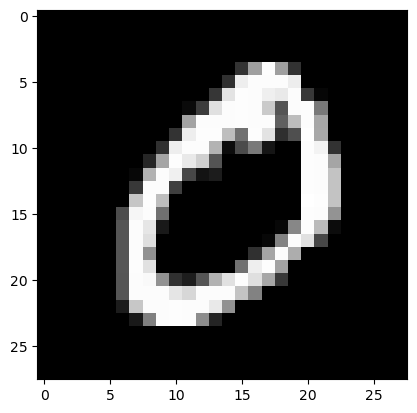

In [12]:
import matplotlib.pyplot as plt

img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.

#### Load Dataset into DataLoader

Note: you do not use the dataset directly in training but through a `DataLoader` class. This allows you to read data in batches, not samples. It also always you to preprocess the data.

Load data is loaded into a DataLoader with batch size at 32.

In [15]:
from torch.utils.data import DataLoader

# load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

#### Build the Model with `nn.Module`

Build the model class with `nn.Module` for the logistic regression model. 

In [18]:
import torch

# build custom module for logistic regression
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

This model will take a 28x28-pixel image of handwritten digits as input and classify them into one of the 10 output classes of digits 0 to 9. So, here is how you can instantiate the model.


In [19]:
# instantiate the model
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

#### Training the Classifier

Train this model with stochastic gradient descent as the optimizer with learning rate `0.001` and cross-entropy as the loss metric.

Then, the model is trained for `50` epochs. 

Note: You have use the `view()` method to flatten the image matrices into rows to fit the the logistic regression model input.



In [21]:
# defining the optimizer
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()

epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.194711685180664. Accuracy: 64.23
Epoch: 1. Loss: 2.0938472747802734. Accuracy: 73.5
Epoch: 2. Loss: 2.0086636543273926. Accuracy: 76.82
Epoch: 3. Loss: 2.01739239692688. Accuracy: 78.99
Epoch: 4. Loss: 1.9482910633087158. Accuracy: 80.27
Epoch: 5. Loss: 1.961714267730713. Accuracy: 80.89
Epoch: 6. Loss: 1.9112533330917358. Accuracy: 81.42
Epoch: 7. Loss: 1.8736302852630615. Accuracy: 81.93
Epoch: 8. Loss: 1.8654197454452515. Accuracy: 82.35
Epoch: 9. Loss: 1.8651485443115234. Accuracy: 82.64
Epoch: 10. Loss: 1.8776490688323975. Accuracy: 82.84
Epoch: 11. Loss: 1.8514214754104614. Accuracy: 83.06
Epoch: 12. Loss: 1.7732685804367065. Accuracy: 83.21
Epoch: 13. Loss: 1.8212530612945557. Accuracy: 83.46
Epoch: 14. Loss: 1.8138841390609741. Accuracy: 83.68
Epoch: 15. Loss: 1.7849153280258179. Accuracy: 83.8
Epoch: 16. Loss: 1.7820781469345093. Accuracy: 84.03
Epoch: 17. Loss: 1.8000249862670898. Accuracy: 84.2
Epoch: 18. Loss: 1.7725210189819336. Accuracy: 84.37
Epoch: 19.

Plot the loss and accuracy. Accuracy can be improved further if the model is trained longer.

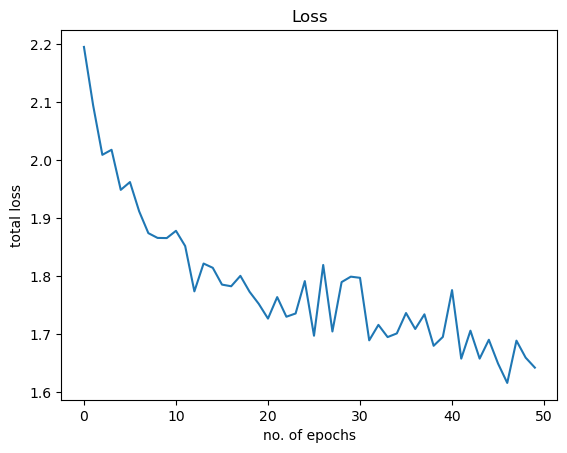

In [22]:
plt.plot(Loss)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

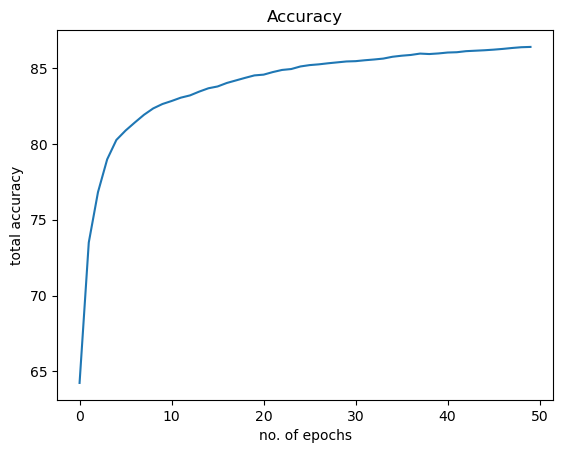

In [23]:
plt.plot(acc)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()